In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Upload the data unto a dataframe

In [2]:
# load excel sheet to pandas dataframe
sheet_num = [1,2,3,4,5,6,9,10,11]
sheets = [i for i in range(len(sheet_num)+1)]
exc = pd.read_excel("data\Switching_test_data_aug2.xlsx", sheet_name=sheets)

########## This will create a dataframe for the features #######
features = exc[0]
features.drop(features.index[[0,1]], inplace=True)
features.columns = features.iloc[0]
features.drop(features.index[[0]], inplace=True)
features.reset_index(drop=True, inplace=True)


# This will create a dataframe containing the targets
dfs = []
for i in range(1,len(sheet_num)+1):
    #set column names from row
    exc[i].columns = exc[i].iloc[0]
    display(exc[i])
    # Drop uneeded row
    exc[i] = exc[i].drop(0)
    s = sheet_num[i-1]
    exc[i]['Sample'] = 'Sample_'+ str(s)
    display(exc[i])
    dfs.append(exc[i])
    
print(dfs)
dataDf = pd.concat(dfs)
dataDf = dataDf[['Set voltage','Reset voltage', 'Form voltage','Set time', 'Reset time','Sample']]
dataDf.reset_index(drop=True, inplace=True)

# These are the Features of the data
display(features)
# These will be used as the targets
display(dataDf)

,Sample 1,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample 1,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
1,NaN,1.0,NaN,-3.52,8.15,120 ns,6.2 us
2,NaN,2.0,4.95,-2.75,NaN,160 ns,5 us
3,NaN,3.0,1.45,-2.45,NaN,250 ns,3.7 us
4,NaN,4.0,2.3,-2.3,NaN,80 ns,2.2 us
...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN


,Sample 1,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time,Sample
1,NaN,1.0,NaN,-3.52,8.15,120 ns,6.2 us,Sample_1
2,NaN,2.0,4.95,-2.75,NaN,160 ns,5 us,Sample_1
3,NaN,3.0,1.45,-2.45,NaN,250 ns,3.7 us,Sample_1
4,NaN,4.0,2.3,-2.3,NaN,80 ns,2.2 us,Sample_1
5,NaN,5.0,3.3,-2.67,NaN,125 ns,1.7 us,Sample_1
...,...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN,Sample_1
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN,Sample_1
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN,Sample_1
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN,Sample_1


,Sample 2,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample 2,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
1,NaN,1.0,NaN,-2.4,11,240 ns,140 ns
2,NaN,2.0,1.4,-4.9,NaN,120 ns,3.2 us
3,NaN,3.0,5,-1.9,NaN,150 ns,3.4 us
4,NaN,4.0,NaN,-1.2,1.8,140 ns,2.9 us
...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN


,Sample 2,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time,Sample
1,NaN,1.0,NaN,-2.4,11,240 ns,140 ns,Sample_2
2,NaN,2.0,1.4,-4.9,NaN,120 ns,3.2 us,Sample_2
3,NaN,3.0,5,-1.9,NaN,150 ns,3.4 us,Sample_2
4,NaN,4.0,NaN,-1.2,1.8,140 ns,2.9 us,Sample_2
5,NaN,5.0,0.77,-0.6,NaN,100 ns,2.7 us,Sample_2
...,...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN,Sample_2
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN,Sample_2
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN,Sample_2
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN,Sample_2


,Sample 3,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample 3,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
1,NaN,1.0,NaN,-1.9,1.7,400 ns,33 us
2,NaN,2.0,1.77,-1.8,NaN,100 ns,12 us
3,NaN,3.0,1.7,-4.7,NaN,120 ns,4.1 us
4,NaN,4.0,NaN,-2.5,6.1,130 ns,.89 us
...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN


,Sample 3,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time,Sample
1,NaN,1.0,NaN,-1.9,1.7,400 ns,33 us,Sample_3
2,NaN,2.0,1.77,-1.8,NaN,100 ns,12 us,Sample_3
3,NaN,3.0,1.7,-4.7,NaN,120 ns,4.1 us,Sample_3
4,NaN,4.0,NaN,-2.5,6.1,130 ns,.89 us,Sample_3
5,NaN,5.0,NaN,-9.6,7.1,180 ns,3.1 us,Sample_3
...,...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN,Sample_3
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN,Sample_3
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN,Sample_3
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN,Sample_3


,Sample 4,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample 4,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
1,NaN,1.0,NaN,-1.05,3.9,180 ns,200 ns
2,NaN,2.0,2.1,-2,NaN,125 ns,3 us
3,NaN,3.0,NaN,-4.5,5.9,150 ns,NaN
4,NaN,4.0,5.1,-1.3,NaN,50ns,NaN
...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN


,Sample 4,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time,Sample
1,NaN,1.0,NaN,-1.05,3.9,180 ns,200 ns,Sample_4
2,NaN,2.0,2.1,-2,NaN,125 ns,3 us,Sample_4
3,NaN,3.0,NaN,-4.5,5.9,150 ns,NaN,Sample_4
4,NaN,4.0,5.1,-1.3,NaN,50ns,NaN,Sample_4
5,NaN,5.0,8.5,-5.7,NaN,NaN,NaN,Sample_4
...,...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN,Sample_4
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN,Sample_4
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN,Sample_4
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN,Sample_4


,Sample 5,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample 5,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
1,NaN,1.0,NaN,-2.5,5.6,130 ns,11 us
2,NaN,2.0,2.8,-10.9,NaN,NaN,NaN
3,NaN,3.0,NaN,-2,5.6,NaN,NaN
4,NaN,4.0,7.5,-1.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN


,Sample 5,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time,Sample
1,NaN,1.0,NaN,-2.5,5.6,130 ns,11 us,Sample_5
2,NaN,2.0,2.8,-10.9,NaN,NaN,NaN,Sample_5
3,NaN,3.0,NaN,-2,5.6,NaN,NaN,Sample_5
4,NaN,4.0,7.5,-1.5,NaN,NaN,NaN,Sample_5
5,NaN,5.0,2.2,-1.2,3,NaN,NaN,Sample_5
...,...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN,Sample_5
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN,Sample_5
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN,Sample_5
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN,Sample_5


,Sample 6,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample 6,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time
1,NaN,1.0,NaN,-0.37,5.1,100 ns,26 us
2,NaN,2.0,2.8,-1.5,NaN,120 ns,NaN
3,NaN,3.0,NaN,-0.85,0.8,300 ns,NaN
4,NaN,4.0,1.8,-0.95,NaN,100 ns,NaN
...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN


,Sample 6,NaN,Set voltage,Reset voltage,Form voltage,Set time,Reset time,Sample
1,NaN,1.0,NaN,-0.37,5.1,100 ns,26 us,Sample_6
2,NaN,2.0,2.8,-1.5,NaN,120 ns,NaN,Sample_6
3,NaN,3.0,NaN,-0.85,0.8,300 ns,NaN,Sample_6
4,NaN,4.0,1.8,-0.95,NaN,100 ns,NaN,Sample_6
5,NaN,5.0,2.1,-0.87,NaN,160 ns,NaN,Sample_6
...,...,...,...,...,...,...,...,...
218,NaN,218.0,NaN,NaN,NaN,NaN,NaN,Sample_6
219,NaN,219.0,NaN,NaN,NaN,NaN,NaN,Sample_6
220,NaN,220.0,NaN,NaN,NaN,NaN,NaN,Sample_6
221,NaN,221.0,NaN,NaN,NaN,NaN,NaN,Sample_6


,Sample 9,NaN,NaN,Set voltage,Reset voltage
0,Sample 9,NaN,NaN,Set voltage,Reset voltage
1,NaN,NaN,1.0,1.1,-1.78
2,NaN,NaN,2.0,1.18,-1.08
3,NaN,NaN,3.0,1.26,-1.44
4,NaN,NaN,4.0,1.32,-0.8
...,...,...,...,...,...
173,NaN,NaN,173.0,1.5,-1.04
174,NaN,NaN,174.0,1.86,-1.33
175,NaN,NaN,175.0,1.38,-1.65
176,NaN,NaN,176.0,1.2,-1.74


,Sample 9,NaN,NaN,Set voltage,Reset voltage,Sample
1,NaN,NaN,1.0,1.1,-1.78,Sample_9
2,NaN,NaN,2.0,1.18,-1.08,Sample_9
3,NaN,NaN,3.0,1.26,-1.44,Sample_9
4,NaN,NaN,4.0,1.32,-0.8,Sample_9
5,NaN,NaN,5.0,0.58,-0.48,Sample_9
...,...,...,...,...,...,...
173,NaN,NaN,173.0,1.5,-1.04,Sample_9
174,NaN,NaN,174.0,1.86,-1.33,Sample_9
175,NaN,NaN,175.0,1.38,-1.65,Sample_9
176,NaN,NaN,176.0,1.2,-1.74,Sample_9


,Sample 10,NaN,Set voltage,Reset voltage
0,Sample 10,NaN,Set voltage,Reset voltage
1,NaN,1.0,1.88,-2.54
2,NaN,2.0,1.2,-1.68
3,NaN,3.0,1.5,-2.62
4,NaN,4.0,2.62,-2.28
...,...,...,...,...
116,NaN,116.0,3.4,-1.78
117,NaN,117.0,2.74,-2.92
118,NaN,118.0,1.56,-0.96
119,NaN,119.0,1.8,-1.88


,Sample 10,NaN,Set voltage,Reset voltage,Sample
1,NaN,1.0,1.88,-2.54,Sample_10
2,NaN,2.0,1.2,-1.68,Sample_10
3,NaN,3.0,1.5,-2.62,Sample_10
4,NaN,4.0,2.62,-2.28,Sample_10
5,NaN,5.0,2.8,-1.06,Sample_10
...,...,...,...,...,...
116,NaN,116.0,3.4,-1.78,Sample_10
117,NaN,117.0,2.74,-2.92,Sample_10
118,NaN,118.0,1.56,-0.96,Sample_10
119,NaN,119.0,1.8,-1.88,Sample_10


,Sample 11,NaN,NaN,NaN,Set voltage,Reset voltage
0,Sample 11,NaN,NaN,NaN,Set voltage,Reset voltage
1,NaN,NaN,NaN,1.0,3.28,-1.44
2,NaN,NaN,NaN,2.0,5.86,-3.9
3,NaN,NaN,NaN,3.0,2.14,-1.16
4,NaN,NaN,NaN,4.0,2.42,-1.3
...,...,...,...,...,...,...
218,NaN,NaN,NaN,218.0,3.2,-1.86
219,NaN,NaN,NaN,219.0,4.7,-2.48
220,NaN,NaN,NaN,220.0,3.06,-2.18
221,NaN,NaN,NaN,221.0,4.74,-1.6


,Sample 11,NaN,NaN,NaN,Set voltage,Reset voltage,Sample
1,NaN,NaN,NaN,1.0,3.28,-1.44,Sample_11
2,NaN,NaN,NaN,2.0,5.86,-3.9,Sample_11
3,NaN,NaN,NaN,3.0,2.14,-1.16,Sample_11
4,NaN,NaN,NaN,4.0,2.42,-1.3,Sample_11
5,NaN,NaN,NaN,5.0,5.38,NaN,Sample_11
...,...,...,...,...,...,...,...
218,NaN,NaN,NaN,218.0,3.2,-1.86,Sample_11
219,NaN,NaN,NaN,219.0,4.7,-2.48,Sample_11
220,NaN,NaN,NaN,220.0,3.06,-2.18,Sample_11
221,NaN,NaN,NaN,221.0,4.74,-1.6,Sample_11


[0   Sample 1    NaN Set voltage Reset voltage Form voltage Set time  \
1        NaN    1.0         NaN         -3.52         8.15   120 ns   
2        NaN    2.0        4.95         -2.75          NaN   160 ns   
3        NaN    3.0        1.45         -2.45          NaN   250 ns   
4        NaN    4.0         2.3          -2.3          NaN    80 ns   
5        NaN    5.0         3.3         -2.67          NaN   125 ns   
..       ...    ...         ...           ...          ...      ...   
218      NaN  218.0         NaN           NaN          NaN      NaN   
219      NaN  219.0         NaN           NaN          NaN      NaN   
220      NaN  220.0         NaN           NaN          NaN      NaN   
221      NaN  221.0         NaN           NaN          NaN      NaN   
222      NaN  222.0         NaN           NaN          NaN      NaN   

0   Reset time    Sample  
1       6.2 us  Sample_1  
2         5 us  Sample_1  
3       3.7 us  Sample_1  
4       2.2 us  Sample_1  
5       1.7

2,NaN,Process parameters,Bottom electrode material,Resistive switching film,Honey concentration (by weight),Spin-coating rate (rpm),Baking temperature (°C),Baking time (hours),Top electrode material
0,NaN,Sample 1,ITO,pure honey,0.3,3000,140,2,Al
1,NaN,Sample 2,ITO,pure honey,0.3,3000,140,4,Al
2,NaN,Sample 3,ITO,pure honey,0.3,3000,90,8,Al
3,NaN,Sample 4,Cu,pure honey,0.3,3000,140,2,Al
4,NaN,Sample 5,Cu,pure honey,0.3,3000,140,4,Al
5,NaN,Sample 6,Cu,pure honey,0.3,3000,90,8,Al
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Sample 7,ITO,honey/CNT,0.3,3000,140,2,Al
8,NaN,Sample 8,ITO,honey/CNT,0.3,3000,140,4,Al
9,NaN,Sample 9,ITO,honey/CNT,0.3,3000,90,8,Al


,Set voltage,Reset voltage,Form voltage,Set time,Reset time,Sample
0,NaN,-3.52,8.15,120 ns,6.2 us,Sample_1
1,4.95,-2.75,NaN,160 ns,5 us,Sample_1
2,1.45,-2.45,NaN,250 ns,3.7 us,Sample_1
3,2.3,-2.3,NaN,80 ns,2.2 us,Sample_1
4,3.3,-2.67,NaN,125 ns,1.7 us,Sample_1
...,...,...,...,...,...,...
1846,3.2,-1.86,NaN,NaN,NaN,Sample_11
1847,4.7,-2.48,NaN,NaN,NaN,Sample_11
1848,3.06,-2.18,NaN,NaN,NaN,Sample_11
1849,4.74,-1.6,NaN,NaN,NaN,Sample_11


## Reduce dataframe columns to the selected Features

In [3]:
# Reduce Feature dataframe to columns of value
X_df = features[['Process parameters', 'Bottom electrode material','Resistive switching film','Baking temperature (°C)', 'Baking time (hours)','Top electrode material']]
display(X_df)

2,Process parameters,Bottom electrode material,Resistive switching film,Baking temperature (°C),Baking time (hours),Top electrode material
0,Sample 1,ITO,pure honey,140,2,Al
1,Sample 2,ITO,pure honey,140,4,Al
2,Sample 3,ITO,pure honey,90,8,Al
3,Sample 4,Cu,pure honey,140,2,Al
4,Sample 5,Cu,pure honey,140,4,Al
5,Sample 6,Cu,pure honey,90,8,Al
6,NaN,NaN,NaN,NaN,NaN,NaN
7,Sample 7,ITO,honey/CNT,140,2,Al
8,Sample 8,ITO,honey/CNT,140,4,Al
9,Sample 9,ITO,honey/CNT,90,8,Al


## Processing the data

In [4]:
# We need to put the merge the dataframes by sample. So we must change the 'Process parameters' column  to 'Sample', in 
# the Features dataframe and changed the values to 'Sample_#'
for i in range(X_df.shape[0]):
    from_str = 'Sample ' + str(i+1)
    to_str = 'Sample_' + str(i+1)
    print(from_str,to_str)
    X_df = X_df.replace(from_str, to_str)

newX_df= X_df.rename(columns={"Process parameters": "Sample"})
display(newX_df)

Sample 1 Sample_1
Sample 2 Sample_2
Sample 3 Sample_3
Sample 4 Sample_4
Sample 5 Sample_5
Sample 6 Sample_6
Sample 7 Sample_7
Sample 8 Sample_8
Sample 9 Sample_9
Sample 10 Sample_10
Sample 11 Sample_11
Sample 12 Sample_12
Sample 13 Sample_13
Sample 14 Sample_14
Sample 15 Sample_15
Sample 16 Sample_16
Sample 17 Sample_17
Sample 18 Sample_18
Sample 19 Sample_19
Sample 20 Sample_20
Sample 21 Sample_21
Sample 22 Sample_22


2,Sample,Bottom electrode material,Resistive switching film,Baking temperature (°C),Baking time (hours),Top electrode material
0,Sample_1,ITO,pure honey,140.0,2.0,Al
1,Sample_2,ITO,pure honey,140.0,4.0,Al
2,Sample_3,ITO,pure honey,90.0,8.0,Al
3,Sample_4,Cu,pure honey,140.0,2.0,Al
4,Sample_5,Cu,pure honey,140.0,4.0,Al
5,Sample_6,Cu,pure honey,90.0,8.0,Al
6,NaN,NaN,NaN,NaN,NaN,NaN
7,Sample_7,ITO,honey/CNT,140.0,2.0,Al
8,Sample_8,ITO,honey/CNT,140.0,4.0,Al
9,Sample_9,ITO,honey/CNT,90.0,8.0,Al


In [5]:
# Merge the dataframes by sample, in order to align the features and targets.
Datacomb_DF = pd.merge(newX_df, dataDf, on='Sample')
display(Datacomb_DF)

,Sample,Bottom electrode material,Resistive switching film,Baking temperature (°C),Baking time (hours),Top electrode material,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample_1,ITO,pure honey,140.0,2.0,Al,NaN,-3.52,8.15,120 ns,6.2 us
1,Sample_1,ITO,pure honey,140.0,2.0,Al,4.95,-2.75,NaN,160 ns,5 us
2,Sample_1,ITO,pure honey,140.0,2.0,Al,1.45,-2.45,NaN,250 ns,3.7 us
3,Sample_1,ITO,pure honey,140.0,2.0,Al,2.3,-2.3,NaN,80 ns,2.2 us
4,Sample_1,ITO,pure honey,140.0,2.0,Al,3.3,-2.67,NaN,125 ns,1.7 us
...,...,...,...,...,...,...,...,...,...,...,...
1846,Sample_11,Cu,honey/CNT,90.0,8.0,Al,3.2,-1.86,NaN,NaN,NaN
1847,Sample_11,Cu,honey/CNT,90.0,8.0,Al,4.7,-2.48,NaN,NaN,NaN
1848,Sample_11,Cu,honey/CNT,90.0,8.0,Al,3.06,-2.18,NaN,NaN,NaN
1849,Sample_11,Cu,honey/CNT,90.0,8.0,Al,4.74,-1.6,NaN,NaN,NaN


In [6]:
# Remove the 'ns' (nanoseconds) from the 'Set time' column
Datacomb_DF['Set time']=Datacomb_DF['Set time'].str.replace('ns','')
display(Datacomb_DF)

,Sample,Bottom electrode material,Resistive switching film,Baking temperature (°C),Baking time (hours),Top electrode material,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample_1,ITO,pure honey,140.0,2.0,Al,NaN,-3.52,8.15,120,6.2 us
1,Sample_1,ITO,pure honey,140.0,2.0,Al,4.95,-2.75,NaN,160,5 us
2,Sample_1,ITO,pure honey,140.0,2.0,Al,1.45,-2.45,NaN,250,3.7 us
3,Sample_1,ITO,pure honey,140.0,2.0,Al,2.3,-2.3,NaN,80,2.2 us
4,Sample_1,ITO,pure honey,140.0,2.0,Al,3.3,-2.67,NaN,125,1.7 us
...,...,...,...,...,...,...,...,...,...,...,...
1846,Sample_11,Cu,honey/CNT,90.0,8.0,Al,3.2,-1.86,NaN,NaN,NaN
1847,Sample_11,Cu,honey/CNT,90.0,8.0,Al,4.7,-2.48,NaN,NaN,NaN
1848,Sample_11,Cu,honey/CNT,90.0,8.0,Al,3.06,-2.18,NaN,NaN,NaN
1849,Sample_11,Cu,honey/CNT,90.0,8.0,Al,4.74,-1.6,NaN,NaN,NaN


In [7]:
# Remove the 'us' from the 'Reset time' column
Datacomb_DF['Reset time']=Datacomb_DF['Reset time'].str.replace('us','')
display(Datacomb_DF)

,Sample,Bottom electrode material,Resistive switching film,Baking temperature (°C),Baking time (hours),Top electrode material,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample_1,ITO,pure honey,140.0,2.0,Al,NaN,-3.52,8.15,120,6.2
1,Sample_1,ITO,pure honey,140.0,2.0,Al,4.95,-2.75,NaN,160,5
2,Sample_1,ITO,pure honey,140.0,2.0,Al,1.45,-2.45,NaN,250,3.7
3,Sample_1,ITO,pure honey,140.0,2.0,Al,2.3,-2.3,NaN,80,2.2
4,Sample_1,ITO,pure honey,140.0,2.0,Al,3.3,-2.67,NaN,125,1.7
...,...,...,...,...,...,...,...,...,...,...,...
1846,Sample_11,Cu,honey/CNT,90.0,8.0,Al,3.2,-1.86,NaN,NaN,NaN
1847,Sample_11,Cu,honey/CNT,90.0,8.0,Al,4.7,-2.48,NaN,NaN,NaN
1848,Sample_11,Cu,honey/CNT,90.0,8.0,Al,3.06,-2.18,NaN,NaN,NaN
1849,Sample_11,Cu,honey/CNT,90.0,8.0,Al,4.74,-1.6,NaN,NaN,NaN


In [8]:
# Convert objects to numerical
for i in Datacomb_DF.keys():
    if i != 'Sample' and i != 'Bottom electrode material' and i != 'Resistive switching film' and i != 'Top electrode material':
        Datacomb_DF[i] = pd.to_numeric(Datacomb_DF[i],errors = 'coerce')
display(Datacomb_DF.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851 entries, 0 to 1850
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sample                     1851 non-null   object 
 1   Bottom electrode material  1851 non-null   object 
 2   Resistive switching film   1851 non-null   object 
 3   Baking temperature (°C)    1851 non-null   float64
 4   Baking time (hours)        1851 non-null   float64
 5   Top electrode material     1851 non-null   object 
 6   Set voltage                890 non-null    float64
 7   Reset voltage              970 non-null    float64
 8   Form voltage               255 non-null    float64
 9   Set time                   113 non-null    float64
 10  Reset time                 51 non-null     float64
dtypes: float64(7), object(4)
memory usage: 173.5+ KB


None

In [9]:
# Applying the condition
Datacomb_DF.loc[Datacomb_DF['Bottom electrode material'] == "ITO", 'Bottom electrode material'] = 0
Datacomb_DF.loc[Datacomb_DF['Bottom electrode material'] == "Cu", 'Bottom electrode material'] = 1
display(Datacomb_DF)

,Sample,Bottom electrode material,Resistive switching film,Baking temperature (°C),Baking time (hours),Top electrode material,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample_1,0,pure honey,140.0,2.0,Al,NaN,-3.52,8.15,120.0,6.2
1,Sample_1,0,pure honey,140.0,2.0,Al,4.95,-2.75,NaN,160.0,5.0
2,Sample_1,0,pure honey,140.0,2.0,Al,1.45,-2.45,NaN,250.0,3.7
3,Sample_1,0,pure honey,140.0,2.0,Al,2.30,-2.30,NaN,80.0,2.2
4,Sample_1,0,pure honey,140.0,2.0,Al,3.30,-2.67,NaN,125.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...
1846,Sample_11,1,honey/CNT,90.0,8.0,Al,3.20,-1.86,NaN,NaN,NaN
1847,Sample_11,1,honey/CNT,90.0,8.0,Al,4.70,-2.48,NaN,NaN,NaN
1848,Sample_11,1,honey/CNT,90.0,8.0,Al,3.06,-2.18,NaN,NaN,NaN
1849,Sample_11,1,honey/CNT,90.0,8.0,Al,4.74,-1.60,NaN,NaN,NaN


In [10]:
# Applying the condition
Datacomb_DF.loc[Datacomb_DF['Top electrode material'] == "Al", 'Top electrode material'] = 2
Datacomb_DF.loc[Datacomb_DF['Top electrode material'] == "Cu", 'Top electrode material'] = 1
display(Datacomb_DF)

,Sample,Bottom electrode material,Resistive switching film,Baking temperature (°C),Baking time (hours),Top electrode material,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample_1,0,pure honey,140.0,2.0,2,NaN,-3.52,8.15,120.0,6.2
1,Sample_1,0,pure honey,140.0,2.0,2,4.95,-2.75,NaN,160.0,5.0
2,Sample_1,0,pure honey,140.0,2.0,2,1.45,-2.45,NaN,250.0,3.7
3,Sample_1,0,pure honey,140.0,2.0,2,2.30,-2.30,NaN,80.0,2.2
4,Sample_1,0,pure honey,140.0,2.0,2,3.30,-2.67,NaN,125.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...
1846,Sample_11,1,honey/CNT,90.0,8.0,2,3.20,-1.86,NaN,NaN,NaN
1847,Sample_11,1,honey/CNT,90.0,8.0,2,4.70,-2.48,NaN,NaN,NaN
1848,Sample_11,1,honey/CNT,90.0,8.0,2,3.06,-2.18,NaN,NaN,NaN
1849,Sample_11,1,honey/CNT,90.0,8.0,2,4.74,-1.60,NaN,NaN,NaN


In [11]:
# Applying the condition
Datacomb_DF.loc[Datacomb_DF['Resistive switching film'] == "pure honey", 'Resistive switching film'] = 0
Datacomb_DF.loc[Datacomb_DF['Resistive switching film'] == "honey/CNT", 'Resistive switching film'] = 1
display(Datacomb_DF)

,Sample,Bottom electrode material,Resistive switching film,Baking temperature (°C),Baking time (hours),Top electrode material,Set voltage,Reset voltage,Form voltage,Set time,Reset time
0,Sample_1,0,0,140.0,2.0,2,NaN,-3.52,8.15,120.0,6.2
1,Sample_1,0,0,140.0,2.0,2,4.95,-2.75,NaN,160.0,5.0
2,Sample_1,0,0,140.0,2.0,2,1.45,-2.45,NaN,250.0,3.7
3,Sample_1,0,0,140.0,2.0,2,2.30,-2.30,NaN,80.0,2.2
4,Sample_1,0,0,140.0,2.0,2,3.30,-2.67,NaN,125.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...
1846,Sample_11,1,1,90.0,8.0,2,3.20,-1.86,NaN,NaN,NaN
1847,Sample_11,1,1,90.0,8.0,2,4.70,-2.48,NaN,NaN,NaN
1848,Sample_11,1,1,90.0,8.0,2,3.06,-2.18,NaN,NaN,NaN
1849,Sample_11,1,1,90.0,8.0,2,4.74,-1.60,NaN,NaN,NaN


## Create Separate DataFrame  for the appropriate Target

### Set_voltage 

In [12]:
# Construct the Dataframe for the target, using the the 'Set voltage' column
setVoltageDf = Datacomb_DF[['Sample','Baking temperature (°C)','Baking time (hours)','Resistive switching film',
                              'Bottom electrode material','Top electrode material','Set voltage']]

display(setVoltageDf[setVoltageDf['Sample'] == 'Sample_10'])
setVoltageDf = setVoltageDf.dropna()
display(setVoltageDf[setVoltageDf['Sample'] == 'Sample_10'])
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_6': 'Sample_5'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_9': 'Sample_6'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_10': 'Sample_7'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_11': 'Sample_8'}})

setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_1': 'Sample_A'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_2': 'Sample_B'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_3': 'Sample_C'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_4': 'Sample_D'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_5': 'Sample_E'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_6': 'Sample_F'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_7': 'Sample_G'}})
setVoltageDf = setVoltageDf.replace({'Sample': {'Sample_8': 'Sample_H'}})

display(setVoltageDf)

,Sample,Baking temperature (°C),Baking time (hours),Resistive switching film,Bottom electrode material,Top electrode material,Set voltage
1509,Sample_10,140.0,2.0,1,1,2,1.88
1510,Sample_10,140.0,2.0,1,1,2,1.20
1511,Sample_10,140.0,2.0,1,1,2,1.50
1512,Sample_10,140.0,2.0,1,1,2,2.62
1513,Sample_10,140.0,2.0,1,1,2,2.80
...,...,...,...,...,...,...,...
1624,Sample_10,140.0,2.0,1,1,2,3.40
1625,Sample_10,140.0,2.0,1,1,2,2.74
1626,Sample_10,140.0,2.0,1,1,2,1.56
1627,Sample_10,140.0,2.0,1,1,2,1.80


,Sample,Baking temperature (°C),Baking time (hours),Resistive switching film,Bottom electrode material,Top electrode material,Set voltage
1509,Sample_10,140.0,2.0,1,1,2,1.88
1510,Sample_10,140.0,2.0,1,1,2,1.20
1511,Sample_10,140.0,2.0,1,1,2,1.50
1512,Sample_10,140.0,2.0,1,1,2,2.62
1513,Sample_10,140.0,2.0,1,1,2,2.80
...,...,...,...,...,...,...,...
1624,Sample_10,140.0,2.0,1,1,2,3.40
1625,Sample_10,140.0,2.0,1,1,2,2.74
1626,Sample_10,140.0,2.0,1,1,2,1.56
1627,Sample_10,140.0,2.0,1,1,2,1.80


,Sample,Baking temperature (°C),Baking time (hours),Resistive switching film,Bottom electrode material,Top electrode material,Set voltage
1,Sample_A,140.0,2.0,0,0,2,4.95
2,Sample_A,140.0,2.0,0,0,2,1.45
3,Sample_A,140.0,2.0,0,0,2,2.30
4,Sample_A,140.0,2.0,0,0,2,3.30
5,Sample_A,140.0,2.0,0,0,2,1.75
...,...,...,...,...,...,...,...
1846,Sample_H,90.0,8.0,1,1,2,3.20
1847,Sample_H,90.0,8.0,1,1,2,4.70
1848,Sample_H,90.0,8.0,1,1,2,3.06
1849,Sample_H,90.0,8.0,1,1,2,4.74


In [13]:
#Change Set voltage to 'SET Voltage'
setVoltageDf.rename(columns = {'Set voltage':'SET Voltage'}, inplace = True)

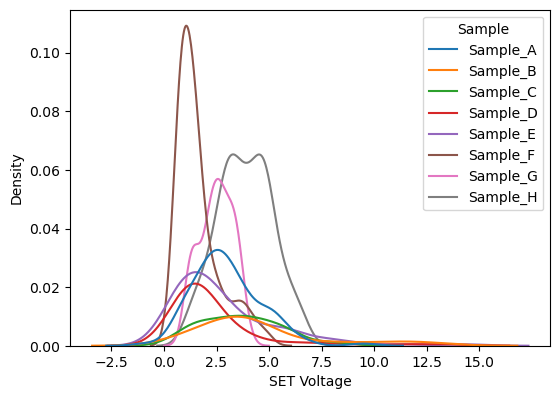

In [14]:
sns.kdeplot(data=setVoltageDf, x="SET Voltage", hue="Sample")
plt.xticks([-2.5,0,2.5,5,7.5,10,12.5,15])
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (9,6.5)
plt.subplots_adjust(bottom=0.18,left=0.15)
plt.savefig('Figures/Set_Voltage_Distribution.jpg',dpi=300)
plt.show()

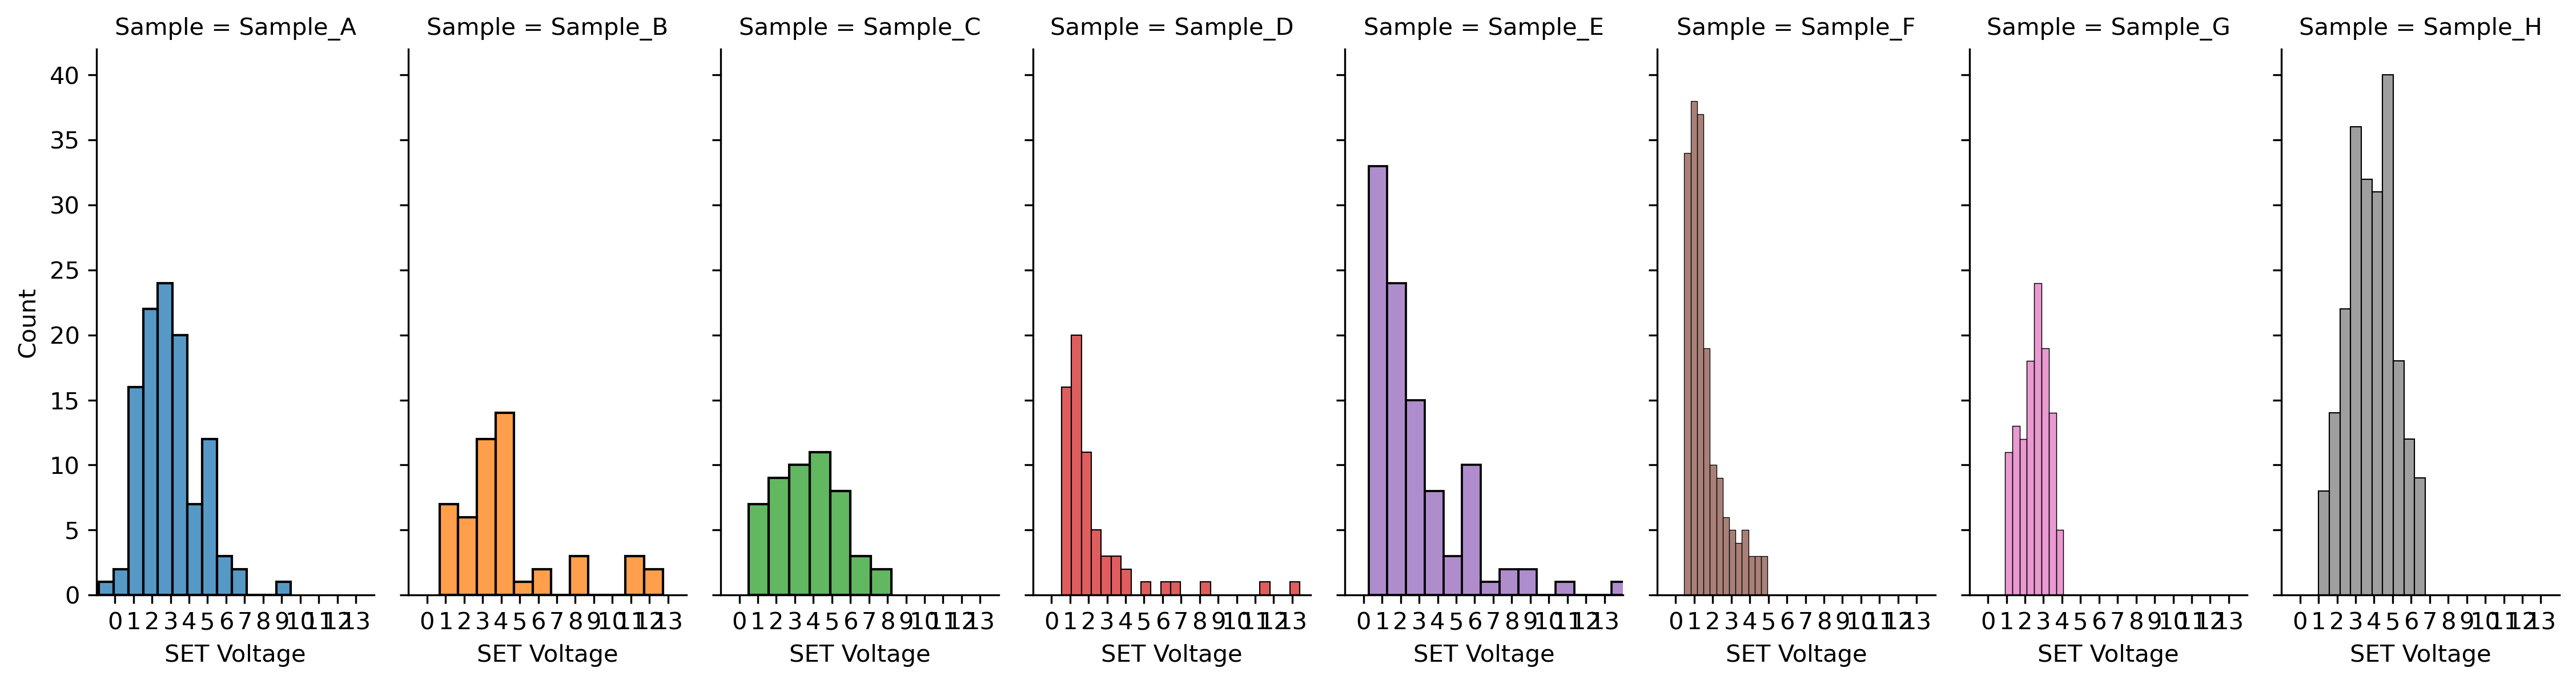

In [15]:
g = sns.FacetGrid(setVoltageDf, col="Sample",hue='Sample',height=2.5,legend_out=True)
g.map(sns.histplot, "SET Voltage")
# Adjust the tick positions and labels
g.set(xticks=np.arange(14),xlim=(-1, 14))
g.fig.set_size_inches(15,5)

### Reset Voltage

In [16]:
# Construct the Dataframe for the target, using the the 'Reset voltage' column
resetVoltageDf =  Datacomb_DF[['Sample','Baking temperature (°C)','Baking time (hours)','Resistive switching film',
                              'Bottom electrode material','Top electrode material','Reset voltage']]
resetVoltageDf = resetVoltageDf.dropna()
display(resetVoltageDf)

,Sample,Baking temperature (°C),Baking time (hours),Resistive switching film,Bottom electrode material,Top electrode material,Reset voltage
0,Sample_1,140.0,2.0,0,0,2,-3.52
1,Sample_1,140.0,2.0,0,0,2,-2.75
2,Sample_1,140.0,2.0,0,0,2,-2.45
3,Sample_1,140.0,2.0,0,0,2,-2.30
4,Sample_1,140.0,2.0,0,0,2,-2.67
...,...,...,...,...,...,...,...
1846,Sample_11,90.0,8.0,1,1,2,-1.86
1847,Sample_11,90.0,8.0,1,1,2,-2.48
1848,Sample_11,90.0,8.0,1,1,2,-2.18
1849,Sample_11,90.0,8.0,1,1,2,-1.60


### Form Voltage

In [17]:
# Construct the Dataframe for the target, using the the 'Reset voltage' column
formVoltageDf =  Datacomb_DF[['Sample','Baking temperature (°C)','Baking time (hours)','Resistive switching film',
                              'Bottom electrode material','Top electrode material','Form voltage']]
formVoltageDf = formVoltageDf.dropna()
display(formVoltageDf)

,Sample,Baking temperature (°C),Baking time (hours),Resistive switching film,Bottom electrode material,Top electrode material,Form voltage
0,Sample_1,140.0,2.0,0,0,2,8.150
10,Sample_1,140.0,2.0,0,0,2,8.600
19,Sample_1,140.0,2.0,0,0,2,6.900
20,Sample_1,140.0,2.0,0,0,2,6.150
21,Sample_1,140.0,2.0,0,0,2,11.200
...,...,...,...,...,...,...,...
1248,Sample_6,90.0,8.0,0,1,2,2.800
1249,Sample_6,90.0,8.0,0,1,2,3.025
1250,Sample_6,90.0,8.0,0,1,2,3.275
1251,Sample_6,90.0,8.0,0,1,2,2.300


In [18]:
setVoltageStats = pd.DataFrame()
setVoltageStats['Set_Voltage_Mean'] = setVoltageDf[["Sample", "SET Voltage"]].groupby(['Sample']).mean()
setVoltageStats['Set_Voltage_STD'] = setVoltageDf[["Sample", "SET Voltage"]].groupby(['Sample']).std()
setVoltageStats['Set_Voltage_Min'] = setVoltageDf[["Sample", "SET Voltage"]].groupby(['Sample']).min() 
setVoltageStats['Set_Voltage_Max']= setVoltageDf[["Sample", "SET Voltage"]].groupby(['Sample']).max()

display(setVoltageStats)
setVoltageStats.to_csv('process_data/setVoltageStats.csv')

,Set_Voltage_Mean,Set_Voltage_STD,Set_Voltage_Min,Set_Voltage_Max
Sample,,,,
Sample_A,2.977045,1.597761,-0.875,9.50
Sample_B,4.425900,2.986744,0.675,12.72
Sample_C,3.647100,1.849857,0.500,8.20
Sample_D,2.333061,2.334147,0.550,13.40
Sample_E,2.808100,2.466977,0.275,14.40
Sample_F,1.614227,1.017776,0.460,4.96
Sample_G,2.491638,0.783879,0.920,4.08
Sample_H,3.863131,1.296368,1.000,6.76


## Save dataframe to CSV

In [19]:
setVoltageDf.to_csv('process_data/setVoltageDf.csv')
resetVoltageDf.to_csv('process_data/resetVoltageDf.csv')
formVoltageDf.to_csv('process_data/formVoltageDf.csv')

In [20]:
# Index by Sample
setVoltageDf.set_index('Sample', inplace=True)

In [21]:
idxs = setVoltageDf.index.unique()

In [23]:
sdf = setVoltageDf.copy()
smps = []
for i in idxs:
    sm = sdf.loc[i].head(1).copy().drop('SET Voltage',axis=1)
    smps.append(sm)

smplsDf = pd.concat(smps,axis=0)
smplsDf.to_csv('process_data/sampleConditions.csv')

# Get KDE

In [ ]:
def synthSetVoltage(df):
        voltage = np.arange(0, 10.01, 0.01).tolist()
        rows = df.values
        idx = df.index.values
        new_rows = []
        for i,r in zip(idx,rows):
            r = r.tolist()
            r.append(i)
            for v in voltage:
                new_r = r.copy()
                new_r.append(v)
                new_rows.append(new_r)
                
        df = pd.DataFrame(new_rows, columns =['Baking temperature (°C)','Baking time (hours)','Resistive switching film',
                                     'Bottom electrode material','Top electrode material','Sample','SET Voltage']) 
        df.set_index('Sample', inplace=True)
        return df

def calcProb(s,kde):
    return np.exp(kde.score([[s]]))


def getKDE(idx,df):
    kdes = []
    synth_kdes = []
    # instantiate kde
    u = np.linspace(-1,14,500)
    # The grid we'll use for plotting
    x_grid = np.linspace(-1, 14, 1000)
    # Plot the three kernel density estimates
    ax = plt
    kde_dicts = {}
    for i in idx:
        d = df.loc[i]
        synth_d = df.loc[i].head(1)
        synth_d = synth_d.drop('SET Voltage',axis=1)
        synth_d = synthSetVoltage(synth_d)
        setVals = d['SET Voltage'].to_numpy()
        x = setVals.reshape(-1,1)
        sh = x.shape[0]
        grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': 10 ** np.linspace(-1, 1, 100)},cv=20) 
        grid.fit(x)
        kde = grid.best_estimator_
        kde_dicts[i] = kde
        v = d['SET Voltage'].apply(lambda x: calcProb(x,kde)).values
        synth_v =  synth_d['SET Voltage'].apply(lambda x: calcProb(x,kde)).values
        d = d.assign(Set_voltage_kde=v)
        synth_d = synth_d.assign(Set_voltage_kde=synth_v)
        #display(synth_d)
        kdes.append(d)
        synth_kdes.append(synth_d)
        
    return kdes,synth_kdes


In [ ]:
kdes,synth_kdes= getKDE(idxs,setVoltageDf)
smplsDf = pd.concat(kdes,axis=0)
synth_df = pd.concat(synth_kdes)
synth_df.to_csv('process_data/setValues_KDE.csv')
smplsDf.to_csv('process_data/setVoltage_KDE.csv')
display(synth_df)
display(smplsDf)